In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
! pip install PyMySQL

In [122]:
import pymysql.cursors

In [123]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [124]:
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [125]:
connection

In [126]:
cursor = connection.cursor()

In [127]:
cursor

In [128]:
# 실행할 SQL 쿼리
# IT서비스주의 2019년 1월 4일의 주가 조회
sql = """
      select T1.STK_CD, T2.STK_NM, T1.DT, T1.C_PRC, T1.O_PRC, T1.H_PRC, T1.L_PRC, T1.VOL
      FROM  HISTORY_DT T1
        inner join STOCK T2 on (T1.STK_CD = T2.STK_CD)
      where T2.STK_NM = '성신양회'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2019-03-31'
"""  

In [129]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

59

In [130]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [131]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('11200.000'),
  'DT': datetime.date(2019, 1, 2),
  'H_PRC': Decimal('12250.000'),
  'L_PRC': Decimal('11050.000'),
  'O_PRC': Decimal('12200.000'),
  'STK_CD': '004980',
  'STK_NM': '성신양회',
  'VOL': Decimal('926302.000')},
 {'C_PRC': Decimal('11300.000'),
  'DT': datetime.date(2019, 1, 3),
  'H_PRC': Decimal('11850.000'),
  'L_PRC': Decimal('10950.000'),
  'O_PRC': Decimal('11300.000'),
  'STK_CD': '004980',
  'STK_NM': '성신양회',
  'VOL': Decimal('782419.000')},
 {'C_PRC': Decimal('11150.000'),
  'DT': datetime.date(2019, 1, 4),
  'H_PRC': Decimal('11400.000'),
  'L_PRC': Decimal('10900.000'),
  'O_PRC': Decimal('11250.000'),
  'STK_CD': '004980',
  'STK_NM': '성신양회',
  'VOL': Decimal('370392.000')},
 {'C_PRC': Decimal('11600.000'),
  'DT': datetime.date(2019, 1, 7),
  'H_PRC': Decimal('11800.000'),
  'L_PRC': Decimal('11300.000'),
  'O_PRC': Decimal('11550.000'),
  'STK_CD': '004980',
  'STK_NM': '성신양회',
  'VOL': Decimal('419191.000')},
 {'C_PRC': Decimal('12250.000'),

In [132]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [133]:
df

,STK_CD,STK_NM,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL
0,004980,성신양회,2019-01-02,11200.000,12200.000,12250.000,11050.000,926302.000
1,004980,성신양회,2019-01-03,11300.000,11300.000,11850.000,10950.000,782419.000
2,004980,성신양회,2019-01-04,11150.000,11250.000,11400.000,10900.000,370392.000
3,004980,성신양회,2019-01-07,11600.000,11550.000,11800.000,11300.000,419191.000
4,004980,성신양회,2019-01-08,12250.000,11750.000,12800.000,11600.000,1561456.000
5,004980,성신양회,2019-01-09,12600.000,12450.000,12650.000,12200.000,667663.000
6,004980,성신양회,2019-01-10,12300.000,12750.000,13100.000,12250.000,844668.000
7,004980,성신양회,2019-01-11,12750.000,12300.000,12800.000,12250.000,738795.000
8,004980,성신양회,2019-01-14,12900.000,12950.000,13050.000,12550.000,635831.000
9,004980,성신양회,2019-01-15,13100.000,12800.000,13450.000,12600.000,1193456.000


In [134]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])
# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "C_PRC" : ] = df.loc[: , "C_PRC" : ].astype(int)
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  59 non-null     object        
 1   STK_NM  59 non-null     object        
 2   DT      59 non-null     datetime64[ns]
 3   C_PRC   59 non-null     int64         
 4   O_PRC   59 non-null     int64         
 5   H_PRC   59 non-null     int64         
 6   L_PRC   59 non-null     int64         
 7   VOL     59 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 3.8+ KB


In [135]:
df = df.set_index("DT")

In [136]:
OBV = []
OBV.append(0)
for i in range(1, len(df.C_PRC)):
  if df.C_PRC[i] > df.C_PRC[i-1]:
    OBV.append(OBV[-1] + df.VOL[i])
  elif df.C_PRC[i] < df.C_PRC[i-1]:
    OBV.append(OBV[-1] - df.VOL[i])
  else:
    OBV.append(OBV[-1])

df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(com=20).mean()
df

,STK_CD,STK_NM,C_PRC,O_PRC,H_PRC,L_PRC,VOL,OBV,OBV_EMA
DT,,,,,,,,,
2019-01-02,004980,성신양회,11200,12200,12250,11050,926302,0,0.000000e+00
2019-01-03,004980,성신양회,11300,11300,11850,10950,782419,782419,4.007512e+05
2019-01-04,004980,성신양회,11150,11250,11400,10900,370392,412027,4.046946e+05
2019-01-07,004980,성신양회,11600,11550,11800,11300,419191,831218,5.192514e+05
2019-01-08,004980,성신양회,12250,11750,12800,11600,1561456,2392674,9.313594e+05
2019-01-09,004980,성신양회,12600,12450,12650,12200,667663,3060337,1.330832e+06
2019-01-10,004980,성신양회,12300,12750,13100,12250,844668,2215669,1.476467e+06
2019-01-11,004980,성신양회,12750,12300,12800,12250,738795,2954464,1.694256e+06
2019-01-14,004980,성신양회,12900,12950,13050,12550,635831,3590295,1.948307e+06


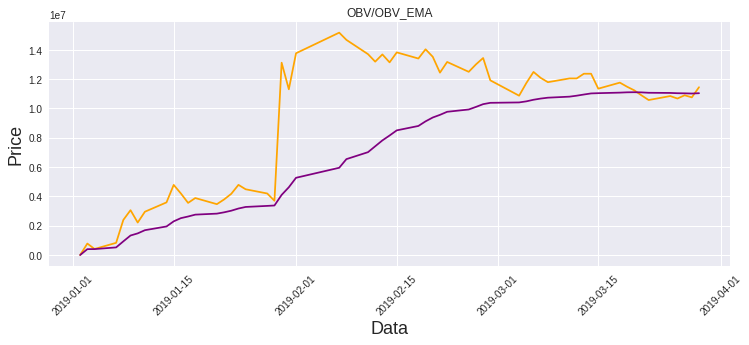

In [137]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['OBV'], label='OBV', color='orange')
plt.plot(df['OBV_EMA'], label='OBV_EMA', color = 'purple')
plt.xticks(rotation=45)
plt.title('OBV/OBV_EMA')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.show()

매수 / 매도 타이밍 신호 찾는 함수 생성
- 매수 신호: OBV > OBV_EMA
- 매도 신호: OBV < OBV_EMA

In [138]:
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal[col1][i] > signal[col2][i] and flag != 1:
      sigPriceBuy.append(signal['C_PRC'][i])
      sigPriceSell.append(np.nan)
      flag = 1
    
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      sigPriceSell.append(signal['C_PRC'][i])
      sigPriceBuy.append(np.nan)
      flag = 0

    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [139]:
x = buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
df

,STK_CD,STK_NM,C_PRC,O_PRC,H_PRC,L_PRC,VOL,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
DT,,,,,,,,,,,
2019-01-02,004980,성신양회,11200,12200,12250,11050,926302,0,0.000000e+00,NaN,NaN
2019-01-03,004980,성신양회,11300,11300,11850,10950,782419,782419,4.007512e+05,11300.0,NaN
2019-01-04,004980,성신양회,11150,11250,11400,10900,370392,412027,4.046946e+05,NaN,NaN
2019-01-07,004980,성신양회,11600,11550,11800,11300,419191,831218,5.192514e+05,NaN,NaN
2019-01-08,004980,성신양회,12250,11750,12800,11600,1561456,2392674,9.313594e+05,NaN,NaN
2019-01-09,004980,성신양회,12600,12450,12650,12200,667663,3060337,1.330832e+06,NaN,NaN
2019-01-10,004980,성신양회,12300,12750,13100,12250,844668,2215669,1.476467e+06,NaN,NaN
2019-01-11,004980,성신양회,12750,12300,12800,12250,738795,2954464,1.694256e+06,NaN,NaN
2019-01-14,004980,성신양회,12900,12950,13050,12550,635831,3590295,1.948307e+06,NaN,NaN


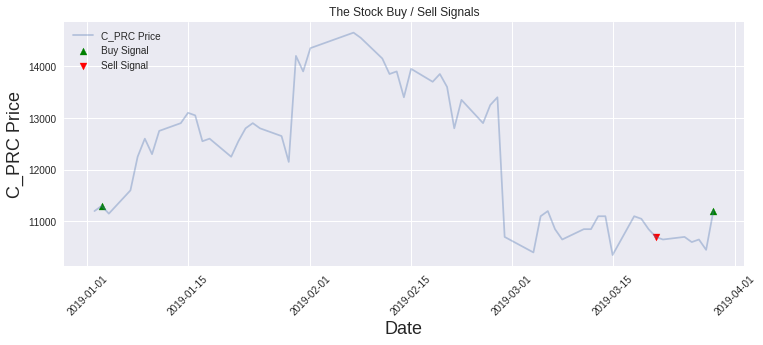

In [140]:
plt.figure(figsize=(12.2, 4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green',
            label = 'Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red',
            label = 'Sell Signal', marker = 'v', alpha = 1)
plt.plot(df['C_PRC'], label='C_PRC Price', alpha = 0.35)
plt.xticks(rotation = 45)
plt.title('The Stock Buy / Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('C_PRC Price', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()